In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('CGI data.csv')

#print the head
df.head()

,date,open,high,low,close,volume
0,10/7/1998,6.125,6.250,6.125,6.220,39200
1,10/8/1998,6.155,6.155,5.970,6.000,19400
2,10/9/1998,5.970,5.970,5.250,5.560,88800
3,10/12/1998,5.625,5.750,5.625,5.625,8800
4,10/13/1998,5.690,5.690,5.405,5.405,18600


c:\users\dell\appdata\local\continuum\anaconda3\envs\tensorflow1\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


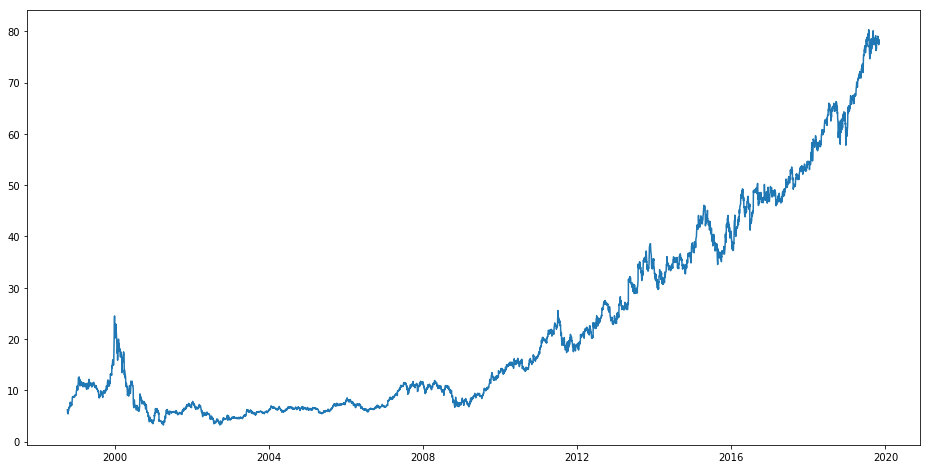

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.date,format='%m/%d/%Y')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['close'], label='Close Price history')

In [3]:
##Moving average method
# importing libraries
import pandas as pd
import numpy as np

# reading the data
df = pd.read_csv('CGI data.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.date,format='%m/%d/%Y')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['close'][i] = data['close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:4550]
valid = new_data[4550:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

# R2_score
from sklearn.metrics import r2_score
r2=r2_score(valid['close'],preds)
print('Regressor Score is  = ',r2)

         date   open   high    low  close  volume
0   10/7/1998  6.125  6.250  6.125  6.220   39200
1   10/8/1998  6.155  6.155  5.970  6.000   19400
2   10/9/1998  5.970  5.970  5.250  5.560   88800
3  10/12/1998  5.625  5.750  5.625  5.625    8800
4  10/13/1998  5.690  5.690  5.405  5.405   18600

 Shape of the data:
(5303, 6)

 Shape of training set:
(4550, 2)

 Shape of validation set:
(753, 2)

 RMSE value on validation set:
94.15179333572279
Regressor Score is  =  -88.06501295014924


c:\users\dell\appdata\local\continuum\anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\dell\appdata\local\continuum\anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


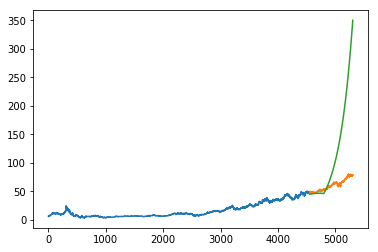

In [4]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])

In [5]:
#!pip install pyramid-arima

In [6]:
## Auto ARIMA
from pyramid.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:4350]
valid = data[4350:]

training = train['close']
validation = valid['close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=953)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

c:\users\dell\appdata\local\continuum\anaconda3\envs\tensorflow1\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\users\dell\appdata\local\continuum\anaconda3\envs\tensorflow1\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\dell\appdata\local\continuum\anaconda3\envs\tensorflow1\lib\site-packages\pyramid\__init__.py:68: UserWarnin

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3662.243, BIC=3694.118, Fit time=43.623 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=6779.588, BIC=6792.338, Fit time=1.766 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5388.886, BIC=5414.386, Fit time=10.078 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3660.434, BIC=3685.934, Fit time=31.139 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3651.891, BIC=3683.766, Fit time=62.448 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=5388.774, BIC=5414.274, Fit time=9.241 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3663.936, BIC=3702.185, Fit time=121.190 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=6781.285, BIC=6800.409, Fit time=2.031 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=3655.394, BIC=3700.019, Fit time=136.818 seconds
Fit ARIMA: order=(1,

In [7]:
rms=np.sqrt(np.mean(np.power((np.array(valid['close'])-np.array(forecast['Prediction'])),2)))
rms

r2=r2_score(valid['close'],forecast['Prediction'])
print('Regressor Score is  = ',r2)

Regressor Score is  =  -0.4455466754620425


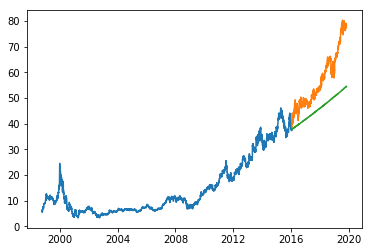

In [8]:
#plot
plt.plot(train['close'])
plt.plot(valid['close'])
plt.plot(forecast['Prediction'])

In [9]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close'][i] = data['close'][i]

#setting index
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:4750,:]
valid = dataset[4750:,:]
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=3, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Using TensorFlow backend.


Epoch 1/3
 - 438s - loss: 3.7935e-04
Epoch 2/3
 - 430s - loss: 1.2395e-04
Epoch 3/3
 - 438s - loss: 9.3704e-05


In [11]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

r2=r2_score(valid,closing_price)
print('Regressor Score is  = ',r2)

Regressor Score is  =  0.9920107747516469


c:\users\dell\appdata\local\continuum\anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


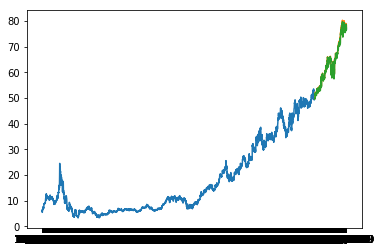

In [12]:
#for plotting
train = new_data[:4750]
valid = new_data[4750:]
valid['Predictions'] = closing_price
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])

In [13]:
from sklearn.metrics import r2_score
r2=r2_score(valid['close'],preds)
print('Regressor Score is  = ',r2)

ValueError: Found input variables with inconsistent numbers of samples: [553, 753]

In [ ]:
valid['close']

In [ ]:
forecast['Prediction']

In [ ]:
x_train.shape

In [ ]:
valid.shape

In [ ]:
5303%80